In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
from scipy.stats import skew, kurtosis, entropy
from skimage import io, filters, feature,  restoration, exposure, morphology
from tqdm import tqdm

In [ ]:
print(os.listdir("/content/drive/MyDrive/Tarp/Dataset/EA")[:5])

['1804691-15.JPG', '1700208-2.JPG', '1804648-33.JPG', 'B1712993-12(4).JPG', '1700491-2.JPG']


In [ ]:
print(os.listdir("/content/drive/MyDrive/Tarp/Dataset/EP")[:5])

['1804701-9.JPG', '1800884-1.JPG', '13.JPG', '32.JPG', 'ú┬ú▒ú╖ú▒ú┤ú╢ú┤ú│ú¡ú│(1).JPG']


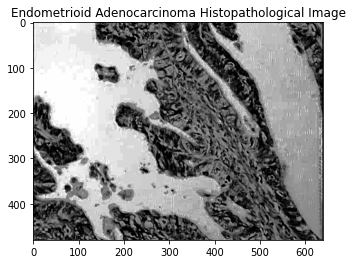

In [ ]:
# def show_img(path):
  
#   """
#   Reading the image
#   """

#   img = cv2.imread(path)
#   return img
def show_img(path, resize = None):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #gray scale
  img = cv2.equalizeHist(img) #histogram equalization
  sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #sharpening image
  img = cv2.filter2D(img,-1,sharpen)
  selem = morphology.square(3)
  img = filters.median(img, selem=selem)
  if resize != None:
    img = cv2.resize(img, resize, interpolation = cv2.INTER_AREA) 
  return img

# def gray_img(path):

#   """
#   Reading the image in the grayscale format
#   """

#   img = cv2.imread(path, 0)
#   return img

def plot_img(path, title = None):

  """
  Plotting the image using plt.imshow(),
  a title won't be added by default,
  but if it's needed you can add it as an argument
  """

  plt.imshow(show_img(path), cmap = "gray")
  if title != None:
    plt.title(title)

plot_img("/content/drive/MyDrive/Tarp/Dataset/EA/1804691-15.JPG", "Endometrioid Adenocarcinoma Histopathological Image")

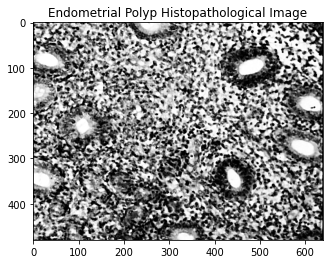

In [ ]:
plot_img("/content/drive/MyDrive/Tarp/Dataset/EP/1804701-9.JPG", "Endometrial Polyp Histopathological Image")

Dataset Size

In [ ]:
print("Class 1 - Endometrioid Adenocarcinoma(EA) {}".format(len(os.listdir("/content/drive/MyDrive/Tarp/Dataset/EA"))))
print("Class 2 - Endometrial Hyperplasia(EH)-Complex {}".format(len(os.listdir("/content/drive/MyDrive/Tarp/Dataset/EH_Complex"))))
print("Class 3 - Endometrial Hyperplasia(EH)-Simple {}".format(len(os.listdir("/content/drive/MyDrive/Tarp/Dataset/EH_Simple"))))
print("Class 4 - Endometrial Polyp(EP) {}".format(len(os.listdir("/content/drive/MyDrive/Tarp/Dataset/EP"))))
print("Class 5 - Normal Endometrium(NE)-Follicular {}".format(len(os.listdir("/content/drive/MyDrive/Tarp/Dataset/NE_Follicular"))))
print("Class 6 - Normal Endometrium(NE)-Luteal {}".format(len(os.listdir("/content/drive/MyDrive/Tarp/Dataset/NE_Luteal"))))
print("Class 7 - Normal Endometrium(NE)-Menstrual {}".format(len(os.listdir("/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual"))))

Class 1 - Endometrioid Adenocarcinoma(EA) 400
Class 2 - Endometrial Hyperplasia(EH)-Complex 282
Class 3 - Endometrial Hyperplasia(EH)-Simple 400
Class 4 - Endometrial Polyp(EP) 400
Class 5 - Normal Endometrium(NE)-Follicular 400
Class 6 - Normal Endometrium(NE)-Luteal 400
Class 7 - Normal Endometrium(NE)-Menstrual 21


1. Image Normalisation
2. Gamma correction
3. Contrast enhanced Grey Image

Image Enhancement Techniques

Histogram Stretching <br>
Histogram Equalization <br>
Image smoothing <br>
Sharpening Filters - Laplacian <br>
Wavelet Transform <br>

Texture Features

LBP - Local Binary Pattern <br>
GLCM - Gray Level Co-occurrence matrix <br>
Features from an Histogram <br>
Gabor Features <br>
Optional - Haar like Features <br>

In [ ]:
sample_img = show_img("/content/drive/MyDrive/Tarp/Dataset/EA/1804691-15.JPG")

Local Binary Pattern Texture Extraction

In [ ]:
class LocalBinaryPatterns:

  def __init__(self, numPoints, radius):
    """
    store the number of points and radius
    """
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps=1e-7):
    
    """
    compute the Local Binary Pattern representation
    of the image, and then use the LBP representation
    to build the histogram of patterns
    """

    lbp = feature.local_binary_pattern(image, self.numPoints,
      self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
      bins=np.arange(0, self.numPoints + 3),
      range=(0, self.numPoints + 2))
    
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    
    # return the histogram of Local Binary Patterns
    return hist

In [ ]:
lbpGen = LocalBinaryPatterns(24, 8)
lbpHistogram = lbpGen.describe(sample_img)
print(lbpHistogram.shape)

(26,)


In [ ]:
lbpHistogram

array([0.04380534, 0.03185872, 0.01405599, 0.00760417, 0.00486979,
       0.00377604, 0.00300456, 0.00373372, 0.00431641, 0.00568034,
       0.00707682, 0.01037435, 0.01160807, 0.01501302, 0.00998698,
       0.0107487 , 0.00780273, 0.00994792, 0.00757487, 0.01013672,
       0.01083984, 0.01625   , 0.02173828, 0.03625326, 0.11833008,
       0.57361328])

In [ ]:
import cv2
from skimage.feature import local_binary_pattern
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/Tarp/Dataset/EA/1804691-15.JPG', cv2.IMREAD_GRAYSCALE)

# Define LBP parameters
radius = 8
n_points = 24
hist_size = 256

# Compute LBP features
lbp = local_binary_pattern(img, n_points, radius, 'uniform')
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, hist_size+1), range=(0, hist_size))
hist = hist.astype('float32')
hist /= np.sum(hist)p[]

# Print the feature vector
print(hist)


[0.03786133 0.0253418  0.01299154 0.00880534 0.00646484 0.00516602
 0.00431641 0.00493815 0.00537109 0.00645833 0.0089095  0.01613932
 0.02007812 0.02295247 0.01327474 0.01399089 0.00993815 0.01152018
 0.00837891 0.01265625 0.01321289 0.02200521 0.02780925 0.03952149
 0.12495442 0.51694334 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

(array([24.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00300456, 0.06006543, 0.1171263 , 0.17418717, 0.23124805,
        0.28830892, 0.34536979, 0.40243066, 0.45949154, 0.51655241,
        0.57361328]),
 <a list of 10 Patch objects>)

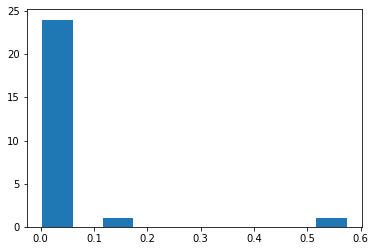

In [ ]:
plt.hist(lbpHistogram)

Histogram Metrics Extraction

Mean, Variance, Skewness, Kurtosis, Energy, and Entropy

In [ ]:
def histogram_metrics(img):

  """
  Mean, Variance, Skewness, Kurtosis and Entropy
  """

  return np.array([
      img.mean(),
      np.var(img),
      skew(img.flatten()),
      kurtosis(img.flatten()),
      entropy(img.flatten())
  ])

print(histogram_metrics(sample_img))

[ 1.29226654e+02  6.02187128e+03 -7.85212709e-02 -1.16391021e+00
  1.24132200e+01]


In [ ]:
def lbp_data_generator(class0, class1, class2, class3, class4, class5, class6):

  lbpGen = LocalBinaryPatterns(24, 8)
  x = []
  y = []
  for i in tqdm(os.listdir(class0)):
    path = os.path.join(class0, i)
    img = show_img(path)
    lbpHistogram = lbpGen.describe(img)
    x.append(lbpHistogram)
    y.append(0)

  for i in tqdm(os.listdir(class1)):
    path = os.path.join(class1, i)
    img = show_img(path)
    lbpHistogram = lbpGen.describe(img)
    x.append(lbpHistogram)
    y.append(1)

  for i in tqdm(os.listdir(class2)):
    path = os.path.join(class2, i)
    img = show_img(path)
    lbpHistogram = lbpGen.describe(img)
    x.append(lbpHistogram)
    y.append(2)

  for i in tqdm(os.listdir(class3)):
    path = os.path.join(class3, i)
    img = show_img(path)
    lbpHistogram = lbpGen.describe(img)
    x.append(lbpHistogram)
    y.append(3)

  for i in tqdm(os.listdir(class4)):
    path = os.path.join(class4, i)
    img = show_img(path)
    lbpHistogram = lbpGen.describe(img)
    x.append(lbpHistogram)
    y.append(4)

  for i in tqdm(os.listdir(class5)):
    path = os.path.join(class5, i)
    img = show_img(path)
    lbpHistogram = lbpGen.describe(img)
    x.append(lbpHistogram)
    y.append(5)
  
  for i in tqdm(os.listdir(class6)):
    path = os.path.join(class6, i)
    img = show_img(path)
    lbpHistogram = lbpGen.describe(img)
    x.append(lbpHistogram)
    y.append(6)

  return np.array(x), np.array(y)

lbp_x, lbp_y = lbp_data_generator("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

print(lbp_x.shape)
print(lbp_y.shape)

100%|██████████| 21/21 [00:19<00:00,  1.09it/s]

(2303, 26)
(2303,)


In [ ]:
np.save("lbp_x", lbp_x)
np.save("lbp_y", lbp_y)

In [ ]:
! cp /content/lbp_x.npy /content/drive/MyDrive/Tarp/New\ Features
! cp /content/lbp_y.npy /content/drive/MyDrive/Tarp/New\ Features

In [ ]:
def img_metrics_generator(class0, class1, class2, class3, class4, class5, class6):
  
  x = []
  y = []
  for i in tqdm(os.listdir(class0)):
    path = os.path.join(class0, i)
    img = show_img(path)
    img_val = histogram_metrics(img)
    x.append(img_val)
    y.append(0)

  for i in tqdm(os.listdir(class1)):
    path = os.path.join(class1, i)
    img = show_img(path)
    img_val = histogram_metrics(img)
    x.append(img_val)
    y.append(1)
  
  for i in tqdm(os.listdir(class2)):
    path = os.path.join(class2, i)
    img = show_img(path)
    img_val = histogram_metrics(img)
    x.append(img_val)
    y.append(2)

  for i in tqdm(os.listdir(class3)):
    path = os.path.join(class3, i)
    img = show_img(path)
    img_val = histogram_metrics(img)
    x.append(img_val)
    y.append(3)
  
  for i in tqdm(os.listdir(class4)):
    path = os.path.join(class4, i)
    img = show_img(path)
    img_val = histogram_metrics(img)
    x.append(img_val)
    y.append(4)

  for i in tqdm(os.listdir(class5)):
    path = os.path.join(class5, i)
    img = show_img(path)
    img_val = histogram_metrics(img)
    x.append(img_val)
    y.append(5)
  
  for i in tqdm(os.listdir(class6)):
    path = os.path.join(class6, i)
    img = show_img(path)
    img_val = histogram_metrics(img)
    x.append(img_val)
    y.append(6)

  return np.array(x), np.array(y)

In [ ]:
img_x, img_y = img_metrics_generator("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

100%|██████████| 21/21 [00:02<00:00,  8.58it/s]


In [ ]:
np.save("histogram_features", img_x)
np.save("histogram_feature_labels", img_y)

In [ ]:
! cp /content/histogram_features.npy /content/drive/MyDrive/Tarp/New\ Features
! cp /content/histogram_feature_labels.npy /content/drive/MyDrive/Tarp/New\ Features

In [ ]:
hist_x = np.load("/content/drive/MyDrive/Tarp/New Features/histogram_features.npy")
hist_y = np.load("/content/drive/MyDrive/Tarp/New Features/histogram_feature_labels.npy")

In [ ]:
hist_x.shape, hist_y.shape

((2303, 5), (2303,))

In [ ]:
lbp_x = np.load("/content/drive/MyDrive/Tarp/New Features/lbp_x.npy")
lbp_y = np.load("/content/drive/MyDrive/Tarp/New Features/lbp_y.npy")

In [ ]:
lbp_x.shape, lbp_y.shape

((2303, 26), (2303,))

In [ ]:
def join_arrays(arr1, arr2):
  arr3 = []
  for i in range(len(arr1)):
    temp = np.append(arr1[i], arr2[i])
    arr3.append(temp)

  return np.array(arr3)

first_arr = np.zeros((1, 10))
second_arr = np.zeros((1, 10))

lbp_hist_x = join_arrays(lbp_x, hist_x)
lbp_hist_y = lbp_y.copy()

print(lbp_hist_x.shape)
print(lbp_hist_y.shape)

(2303, 31)
(2303,)


In [ ]:
np.save("lbp_hist_x", lbp_hist_x)
np.save("lbp_hist_y", lbp_hist_y)

In [ ]:
! cp /content/lbp_hist_x.npy /content/drive/MyDrive/Tarp/Features
! cp /content/lbp_hist_y.npy /content/drive/MyDrive/Tarp/Features

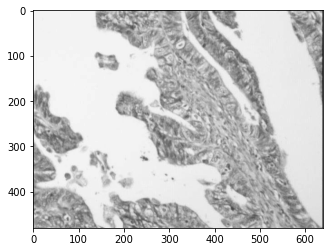

In [ ]:
equ = cv2.equalizeHist(sample_img)
plt.imshow(sample_img, cmap = 'gray')

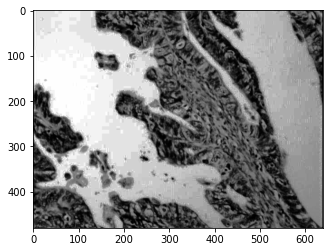

In [ ]:
plt.imshow(equ, cmap = 'gray')

In [ ]:
def equalize_histogram(path):
  img = gray_img(path)
  img = cv2.equalizeHist(img)
  return img

def equalize_histogram_generator(class0, class1, class2, class3, class4, class5, class6):
  
  x = []
  y = []
  for i in tqdm(os.listdir(class0)):
    path = os.path.join(class0, i)
    img = equalize_histogram(path)
    x.append(img)
    y.append(0)

  for i in tqdm(os.listdir(class1)):
    path = os.path.join(class1, i)
    img = equalize_histogram(path)
    x.append(img)
    y.append(1)
  
  for i in tqdm(os.listdir(class2)):
    path = os.path.join(class2, i)
    img = equalize_histogram(path)
    x.append(img)
    y.append(2)

  for i in tqdm(os.listdir(class3)):
    path = os.path.join(class3, i)
    img = equalize_histogram(path)
    x.append(img)
    y.append(3)

  for i in tqdm(os.listdir(class4)):
    path = os.path.join(class4, i)
    img = equalize_histogram(path)
    x.append(img)
    y.append(4)

  for i in tqdm(os.listdir(class5)):
    path = os.path.join(class5, i)
    img = equalize_histogram(path)
    x.append(img)
    y.append(5)

  for i in tqdm(os.listdir(class6)):
    path = os.path.join(class6, i)
    img = equalize_histogram(path)
    x.append(img)
    y.append(6)

  return np.array(x), np.array(y)

equalized_imgs_x, equalized_imgs_labels = equalize_histogram_generator("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

100%|██████████| 21/21 [00:00<00:00, 95.79it/s] 


In [ ]:
equalized_imgs_x.shape

(2303, 480, 640)

In [ ]:
equalized_imgs_labels.shape

(2303,)

In [ ]:
np.save("equalized_imgs", equalized_imgs_x)
np.save("equalized_imgs_labels", equalized_imgs_labels)

In [ ]:
! cp /content/equalized_imgs.npy /content/drive/MyDrive/Tarp/Features
! cp /content/equalized_imgs_labels.npy /content/drive/MyDrive/Tarp/Features

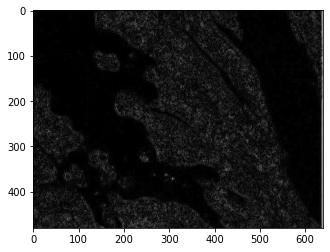

In [ ]:
def laplacian(path):

  img = gray_img(path)
  ddepth = cv2.CV_16S
  kernel_size = 3
  src = cv2.GaussianBlur(img, (3, 3), 0)
  dst = cv2.Laplacian(src, ddepth, ksize=kernel_size)
  abs_dst = cv2.convertScaleAbs(dst)
  
  return abs_dst

plt.imshow(laplacian("/content/drive/MyDrive/Tarp/Dataset/EA/1804691-15.JPG"), cmap = "gray")

In [ ]:
def laplacian_data_generator(class0, class1, class2, class3, class4, class5, class6):
  
  x = []
  y = []
  for i in tqdm(os.listdir(class0)):
    path = os.path.join(class0, i)
    img = laplacian(path)
    x.append(img)
    y.append(0)

  for i in tqdm(os.listdir(class1)):
    path = os.path.join(class1, i)
    img = laplacian(path)
    x.append(img)
    y.append(1)

  for i in tqdm(os.listdir(class2)):
    path = os.path.join(class2, i)
    img = laplacian(path)
    x.append(img)
    y.append(2)

  for i in tqdm(os.listdir(class3)):
    path = os.path.join(class3, i)
    img = laplacian(path)
    x.append(img)
    y.append(3)

  for i in tqdm(os.listdir(class4)):
    path = os.path.join(class4, i)
    img = laplacian(path)
    x.append(img)
    y.append(4)

  for i in tqdm(os.listdir(class5)):
    path = os.path.join(class5, i)
    img = laplacian(path)
    x.append(img)
    y.append(5)

  for i in tqdm(os.listdir(class6)):
    path = os.path.join(class6, i)
    img = laplacian(path)
    x.append(img)
    y.append(6)


  return np.array(x), np.array(y)
lap_x, lap_y = laplacian_data_generator("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

100%|██████████| 21/21 [00:00<00:00, 97.58it/s] 


In [ ]:
lap_x.shape

(2303, 480, 640)

In [ ]:
lap_y.shape

(2303,)

In [ ]:
np.save("lap_x", lap_x)
np.save("lap_y", lap_y)

In [ ]:
! cp /content/lap_x.npy /content/drive/MyDrive/Tarp/Features
! cp /content/lap_y.npy /content/drive/MyDrive/Tarp/Features

Haralick Features

In [ ]:
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [ ]:
import numpy
numpy.__version__

'1.24.2'

In [ ]:
!pip install mahotas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 34.7 MB/s eta 0:00:00


In [ ]:
import mahotas
import mahotas.demos
import mahotas.features

In [ ]:
def haralick(path):
  img=show_img(path)
  features=list(mahotas.features.haralick(img).mean(0)) #haralick
  return features
ht = haralick("/content/drive/MyDrive/Tarp/Dataset/EA/1804691-15.JPG")

In [ ]:
ht

[0.006212458812553299,
 559.301926663544,
 0.9534854255867172,
 6013.036541631881,
 0.41347101792210206,
 258.6894394588701,
 23492.844239863975,
 8.20362178577465,
 11.647995146391954,
 0.0006033883623620303,
 4.4736206011321045,
 -0.39640118013838954,
 0.9981818555992495]

In [ ]:
def haralick_data_generator(class0, class1, class2, class3, class4, class5, class6):
  x = []
  y = []
  for i in tqdm(os.listdir(class0)):
    path = os.path.join(class0, i)
    img = haralick(path)
    x.append(img)
    y.append(0)

  for i in tqdm(os.listdir(class1)):
    path = os.path.join(class1, i)
    img = haralick(path)
    x.append(img)
    y.append(1)

  for i in tqdm(os.listdir(class2)):
    path = os.path.join(class2, i)
    img = haralick(path)
    x.append(img)
    y.append(2)

  for i in tqdm(os.listdir(class3)):
    path = os.path.join(class3, i)
    img = haralick(path)
    x.append(img)
    y.append(3)

  for i in tqdm(os.listdir(class4)):
    path = os.path.join(class4, i)
    img = haralick(path)
    x.append(img)
    y.append(4)

  for i in tqdm(os.listdir(class5)):
    path = os.path.join(class5, i)
    img = haralick(path)
    x.append(img)
    y.append(5)

  for i in tqdm(os.listdir(class6)):
    path = os.path.join(class6, i)
    img = haralick(path)
    x.append(img)
    y.append(6)


  return np.array(x), np.array(y)
haralick_x, haralick_y = haralick_data_generator("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

100%|██████████| 21/21 [00:03<00:00,  5.29it/s]


In [ ]:
haralick_x.shape

(2303, 13)

In [ ]:
haralick_y.shape

(2303,)

In [ ]:
np.save("haralick_x", haralick_x)
np.save("haralick_y", haralick_y)

In [ ]:
! cp /content/haralick_x.npy /content/drive/MyDrive/Tarp/New\ Features
! cp /content/haralick_y.npy /content/drive/MyDrive/Tarp/New\ Features

In [ ]:
hist_x = np.load("/content/drive/MyDrive/Tarp/Features/histogram_features.npy")
hist_y = np.load("/content/drive/MyDrive/Tarp/Features/histogram_feature_labels.npy")

In [ ]:
lbp_x = np.load("/content/drive/MyDrive/Tarp/Features/lbp_x.npy")
lbp_y = np.load("/content/drive/MyDrive/Tarp/Features/lbp_y.npy")

In [ ]:
haralick_x = np.load("/content/drive/MyDrive/Tarp/Features/haralick_x.npy")
haralick_y = np.load("/content/drive/MyDrive/Tarp/Features/haralick_y.npy")

In [ ]:
print(hist_x.shape, hist_y.shape)

(2303, 5) (2303,)


In [ ]:
print(lbp_x.shape, lbp_y.shape)

(2303, 26) (2303,)


In [ ]:
print(haralick_x.shape, haralick_y.shape)

(2303, 13) (2303,)


In [ ]:
def join_arrays(arr1, arr2, arr3):
  arr4 = []
  for i in range(len(arr1)):
    temp = np.append(arr1[i], arr2[i])
    t = np.append(temp, arr3[i])
    arr4.append(t)

  return np.array(arr4)

first_arr = np.zeros((1, 10))
second_arr = np.zeros((1, 10))

lbp_hist_haralick_x = join_arrays(lbp_x, hist_x, haralick_x)
lbp_hist_haralick_y = lbp_y.copy()

print(lbp_hist_haralick_x.shape)
print(lbp_hist_haralick_y.shape)

(2303, 44)
(2303,)


In [ ]:
np.save("lbp_hist_haralick_x", lbp_hist_haralick_x)
np.save("lbp_hist_haralick_y", lbp_hist_haralick_y)

In [ ]:
! cp /content/lbp_hist_haralick_x.npy /content/drive/MyDrive/Tarp/New Features
! cp /content/lbp_hist_haralick_y.npy /content/drive/MyDrive/Tarp/New Features

In [ ]:
def huMoments(path):
  img=show_img(path)
  moments = cv2.moments(img)
  hm = cv2.HuMoments(moments)
  ret = []
  for i in hm:
    ret.append(i[0])
  return ret
hu = huMoments("/content/drive/MyDrive/Tarp/Dataset/EA/1804691-15.JPG")

In [ ]:
len(hu)

7

In [ ]:
hu

[0.001346359727420657,
 2.2506248354268452e-07,
 9.738394764518841e-11,
 6.44260108600657e-11,
 4.358339422194103e-21,
 2.9181469857135613e-14,
 -2.6545590066149103e-21]

In [ ]:
def huMoments_data_generator(class0, class1, class2, class3, class4, class5, class6):
  x = []
  y = []
  for i in tqdm(os.listdir(class0)):
    path = os.path.join(class0, i)
    img = huMoments(path)
    x.append(img)
    y.append(0)

  for i in tqdm(os.listdir(class1)):
    path = os.path.join(class1, i)
    img = huMoments(path)
    x.append(img)
    y.append(1)

  for i in tqdm(os.listdir(class2)):
    path = os.path.join(class2, i)
    img = huMoments(path)
    x.append(img)
    y.append(2)

  for i in tqdm(os.listdir(class3)):
    path = os.path.join(class3, i)
    img = huMoments(path)
    x.append(img)
    y.append(3)

  for i in tqdm(os.listdir(class4)):
    path = os.path.join(class4, i)
    img = huMoments(path)
    x.append(img)
    y.append(4)

  for i in tqdm(os.listdir(class5)):
    path = os.path.join(class5, i)
    img = huMoments(path)
    x.append(img)
    y.append(5)

  for i in tqdm(os.listdir(class6)):
    path = os.path.join(class6, i)
    img = huMoments(path)
    x.append(img)
    y.append(6)


  return np.array(x), np.array(y)
huMoments_x, huMoments_y = huMoments_data_generator("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

100%|██████████| 21/21 [00:01<00:00, 10.79it/s]


In [ ]:
np.save("huMoments_x", huMoments_x)
np.save("huMoments_y", huMoments_y)

In [ ]:
! cp /content/huMoments_x.npy /content/drive/MyDrive/Tarp/New\ Features
! cp /content/huMoments_y.npy /content/drive/MyDrive/Tarp/New\ Features

In [ ]:
huMoments_x.shape, huMoments_y.shape

((2303, 7), (2303,))

In [ ]:
huMoments_x = np.load("/content/drive/MyDrive/Tarp/New Features/huMoments_x.npy")
huMoments_y = np.load("/content/drive/MyDrive/Tarp/New Features/huMoments_y.npy")
huMoments_x.shape, huMoments_y.shape

((2303, 7), (2303,))

In [ ]:
hist_x = np.load("/content/drive/MyDrive/Tarp/New Features/histogram_features.npy")
hist_y = np.load("/content/drive/MyDrive/Tarp/New Features/histogram_feature_labels.npy")
hist_x.shape, hist_y.shape

((2303, 5), (2303,))

In [ ]:
lbp_x = np.load("/content/drive/MyDrive/Tarp/New Features/lbp_x.npy")
lbp_y = np.load("/content/drive/MyDrive/Tarp/New Features/lbp_y.npy")
lbp_x.shape, lbp_y.shape

((2303, 26), (2303,))

In [ ]:
haralick_x = np.load("/content/drive/MyDrive/Tarp/New Features/haralick_x.npy")
haralick_y = np.load("/content/drive/MyDrive/Tarp/New Features/haralick_y.npy")
haralick_x.shape, haralick_y.shape

((2303, 13), (2303,))

In [ ]:
def join_arrays(arr1, arr2, arr3, arr4):
  arr5 = []
  for i in range(len(arr1)):
    temp = np.append(arr1[i], arr2[i])
    temp1 = np.append(temp, arr3[i])
    t = np.append(temp1, arr4[i])
    arr5.append(t)
  return np.array(arr5)

lbp_hist_haralick_huMoments_x = join_arrays(lbp_x, hist_x, haralick_x, huMoments_x)
lbp_hist_haralick_huMoments_y = lbp_y.copy()

print(lbp_hist_haralick_huMoments_x.shape)
print(lbp_hist_haralick_huMoments_y.shape)

(2303, 51)
(2303,)


In [ ]:
np.save("lbp_hist_haralick_huMoments_x", lbp_hist_haralick_huMoments_x)
np.save("lbp_hist_haralick_huMoments_y", lbp_hist_haralick_huMoments_y)

In [ ]:
! cp /content/lbp_hist_haralick_huMoments_x.npy /content/drive/MyDrive/Tarp/New\ Features
! cp /content/lbp_hist_haralick_huMoments_y.npy /content/drive/MyDrive/Tarp/New\ Features

In [ ]:
lbp_hist_haralick_huMoments_x.shape, lbp_hist_haralick_huMoments_x.shape

((2303, 51), (2303, 51))